In [1]:
!pip install scrapy
!pip install requests
!pip install selenium
import numpy as np
import pandas as pd
import scrapy
import matplotlib.pyplot as plt
import requests
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
import pmdarima as pm
!pip install plotly
import plotly.graph_objs as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
# !pip install -U keras-tuner
# import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
!pip install arch
from arch import arch_model


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 10.3 MB/s eta 0:00:00


## PE Ratio

In [4]:
# Fetch the data
url = 'https://www.macrotrends.net/stocks/charts/META/meta-platforms/pe-ratio'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'}

response = requests.get(url, headers=headers)
response.raise_for_status()
data = pd.read_html(response.text, skiprows=1)
df = pd.DataFrame(data[0])
df = pd.concat([df.columns.to_frame().T, df], ignore_index=True)
df.columns = range(len(df.columns))
df = df[1:]
df = df.rename(columns={0: 'Date', 1: 'Price', 2: 'EPS', 3: 'PE ratio'})
df.set_index('Date', inplace=True)
df = df.iloc[1:, :]
df['PE ratio'] = df['PE ratio'].astype(float)
df.index = pd.to_datetime(df.index)
df = df.sort_index().reset_index()
l = len(df['EPS'])
df.head()

,Date,Price,EPS,PE ratio
0,2013-03-31,25.53,$0.02,1276.37
1,2013-06-30,24.83,$0.23,107.95
2,2013-09-30,50.13,$0.42,119.35
3,2013-12-31,54.54,$0.59,92.43
4,2014-03-31,60.12,$0.75,80.15


                      Date     PE ratio
count                   45    45.000000
mean   2018-09-30 00:00:00    71.082889
min    2013-03-31 00:00:00    12.910000
25%    2015-12-31 00:00:00    25.140000
50%    2018-09-30 00:00:00    31.810000
75%    2021-06-30 00:00:00    70.780000
max    2024-03-31 00:00:00  1276.370000
std                    NaN   185.852637


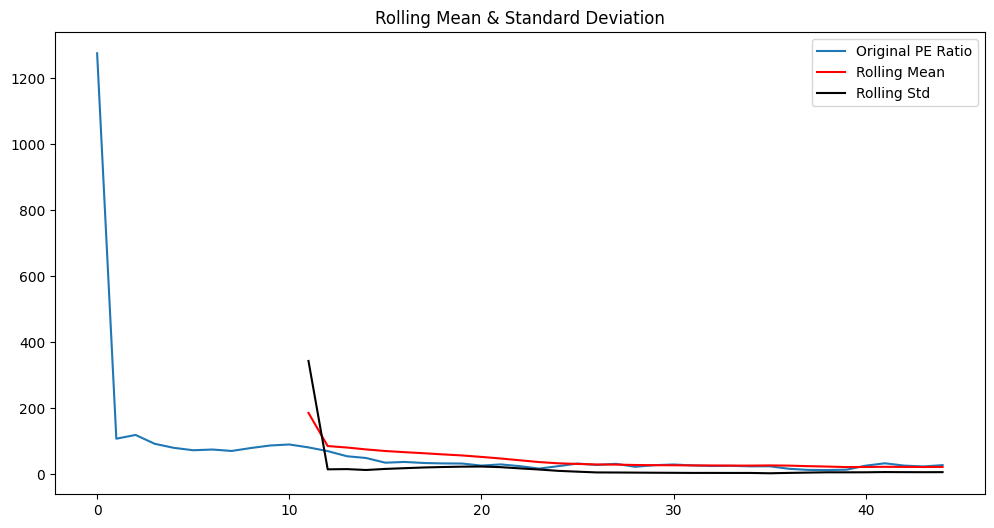

In [5]:
# EDA
# 1. Statistical Summary
df_summary = df.describe()
print(df_summary)

# 4. Rolling Statistics
rolling_window = 12

plt.figure(figsize=(12, 6))
rolling_mean = df['PE ratio'].rolling(window=rolling_window).mean()
rolling_std = df['PE ratio'].rolling(window=rolling_window).std()

plt.plot(df['PE ratio'], label='Original PE Ratio')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

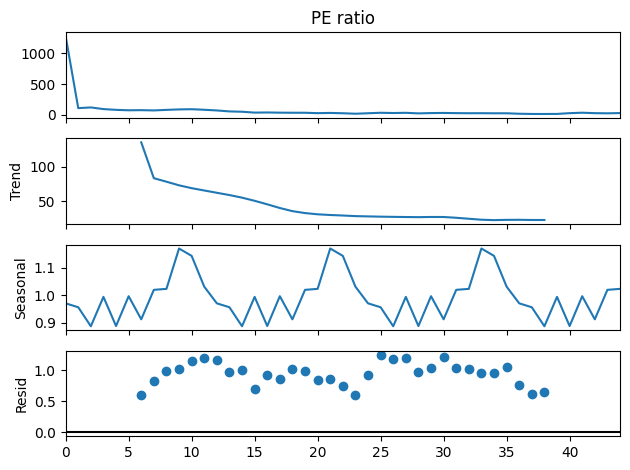

In [6]:
# 5. Decomposition of Time Series
result = seasonal_decompose(df['PE ratio'], model='multiplicative', period=12)
result.plot()
plt.show()

In [7]:
# Check for stationarity
result = adfuller(df['PE ratio'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Values {key}: {value}')


ADF Statistic: -45.81190130157627
p-value: 0.0
Critical Values 1%: -3.5885733964124715
Critical Values 5%: -2.929885661157025
Critical Values 10%: -2.6031845661157025


In [ ]:
# # Difference the series to make it stationary
# df['PE ratio diff'] = df['PE ratio'].diff().dropna()
# result = adfuller(df['PE ratio diff'].dropna())
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# for key, value in result[4].items():
#     print(f'Critical Values {key}: {value}')

ADF Statistic: -4.679205215478182
p-value: 9.205689179093706e-05
Critical Values 1%: -3.560242358792829
Critical Values 5%: -2.9178502070837
Critical Values 10%: -2.5967964150943397


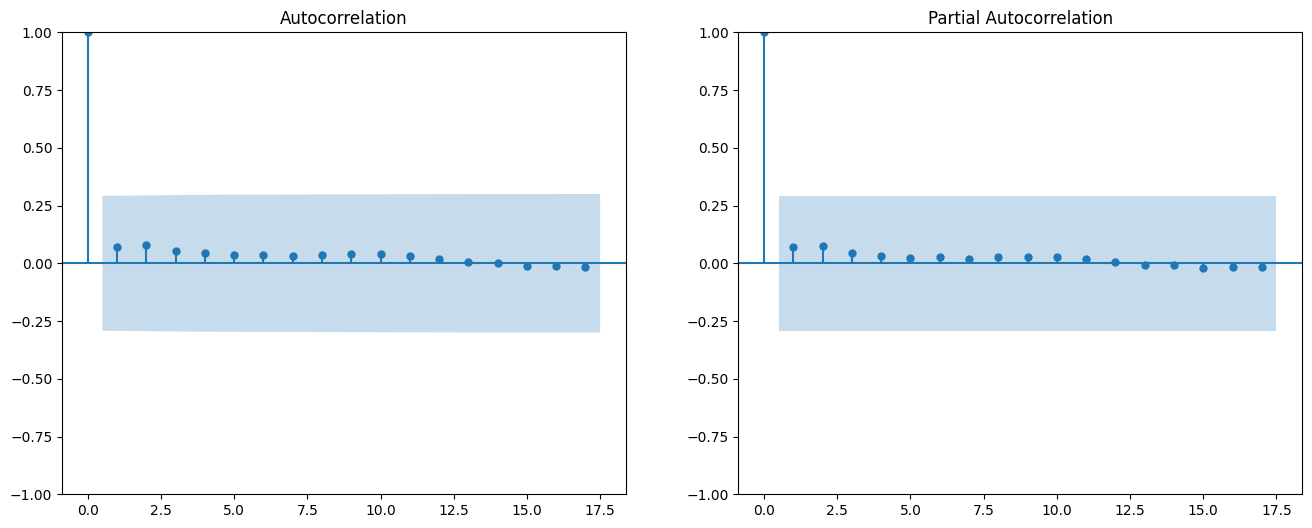

In [8]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df['PE ratio'].dropna(), ax=axes[0])
plot_pacf(df['PE ratio'].dropna(), ax=axes[1])
plt.show()

In [9]:
# Train Test split
train_size = len(df) - 10
train, test = df[:train_size], df[train_size:]

In [10]:
# Fit ARIMA model using pmdarima for automatic selection
ARIMA_model = pm.auto_arima(train['PE ratio'],
                            test='kpss',
                            m=4,               # Seasonal frequency of series
                            seasonal=False,      # No presence of seasonality for standard ARIMA
                            d=None,             # Let the model determine 'd'
                            start_p=0, start_q=0, # Minimum p and q
                            max_p=2, max_q=2,   # Maximum p and q (example values, adjust as needed)
                            D=None,             # Let the model determine 'D'
                            trace=True,         # Print status on the console
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)      # Use stepwise algorithm for faster computation

ARIMA_model.summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=459.795, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=460.480, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=458.961, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.439 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -228.481
Date:                Thu, 18 Jul 2024   AIC                            458.961
Time:                        15:14:35   BIC                            460.488
Sample:                             0   HQIC                           459.482
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.019e+04   2402.573     16.730      0.000    3.55e+04    4.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1360.46
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -5.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Best model ARIMA(0,1,0)

> Add blockquote



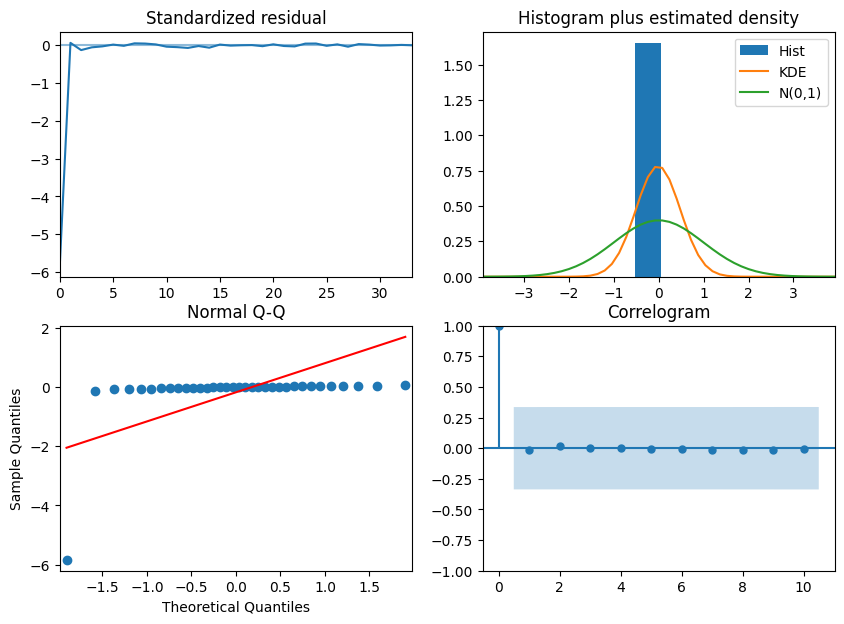

In [11]:
ARIMA_model.plot_diagnostics(figsize=(10,7))
plt.show()

In [12]:
# Ljung-Box test
ARIMA_model = SARIMAX(train['PE ratio'], order=(0,1,0), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)
residuals = ARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,9.586645,0.001960
2,9.596056,0.008246
3,9.597869,0.022313
4,9.598123,0.047770
5,9.598816,0.087434
6,9.599113,0.142581
7,9.600406,0.212371
8,9.600460,0.294195
9,9.600702,0.383766
10,9.601955,0.476081


### Residuals are observed values of iid RVs

In [13]:
# Predictions of last 10 months
ARIMA_pred = ARIMA_model_fit.get_prediction(l-10, l-1).predicted_mean
test['ARIMA_pred'] = ARIMA_pred

<ipython-input-13-5c1591380097>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = ARIMA_pred


In [14]:
# Differencing the data seasonally
df_diff2 = np.diff(df['PE ratio'], n=4)
result = adfuller(df_diff2)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Values {key}: {value}')

ADF Statistic: -3.0035079814206194
p-value: 0.034568095097128666
Critical Values 1%: -3.661428725118324
Critical Values 5%: -2.960525341210433
Critical Values 10%: -2.6193188033298647


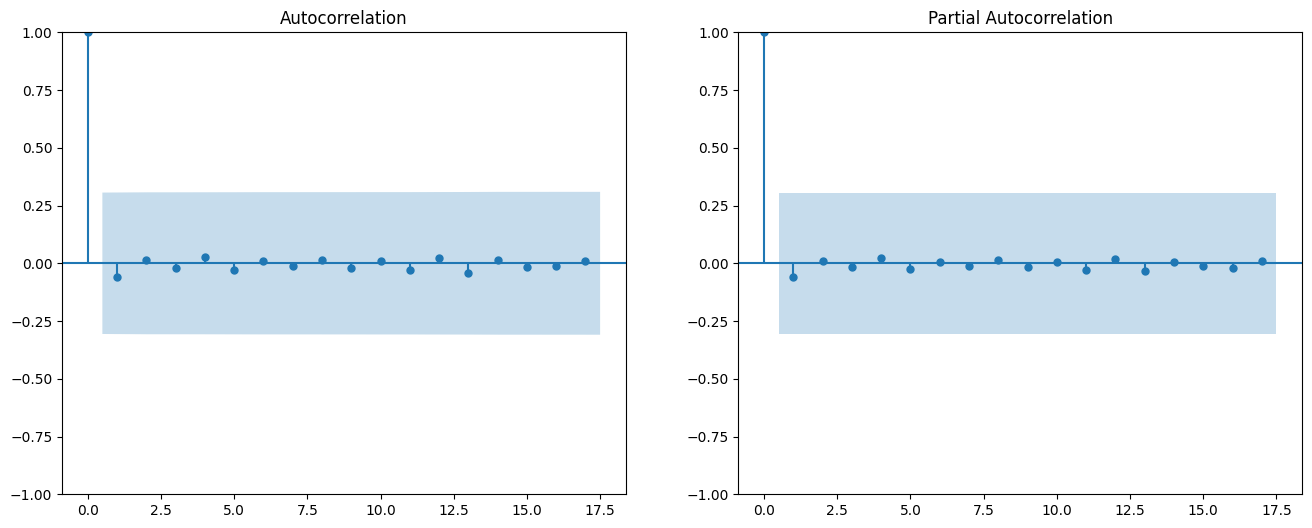

In [15]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(pd.DataFrame(df_diff2).dropna(), ax=axes[0])
plot_pacf(pd.DataFrame(df_diff2).dropna(), ax=axes[1])
plt.show()

In [16]:
SARIMA_model = pm.auto_arima(train["PE ratio"], start_p=1, start_q=1,
                         test='kpss',
                         max_p=5, max_q=5,
                         m=4, #12 is the frequncy of the cycle
                         start_P=1, start_Q=1,
                         max_P = 5, max_Q=5,
                         seasonal=True, #set to seasonal
                         d=None,
                         D=None,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)
SARIMA_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=459.795, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=462.469, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=458.961, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=461.794, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=461.794, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=463.794, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=460.480, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 1.091 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -228.481
Date:                Thu, 18 Jul 2024   AIC                            458.961
Time:                        15:16:07   BIC                            460.488
Sample:                             0   HQIC                           459.482
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.019e+04   2402.573     16.730      0.000    3.55e+04    4.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1360.46
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -5.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Best Model ARIMA(0,1,0)(0,0,0)[4]

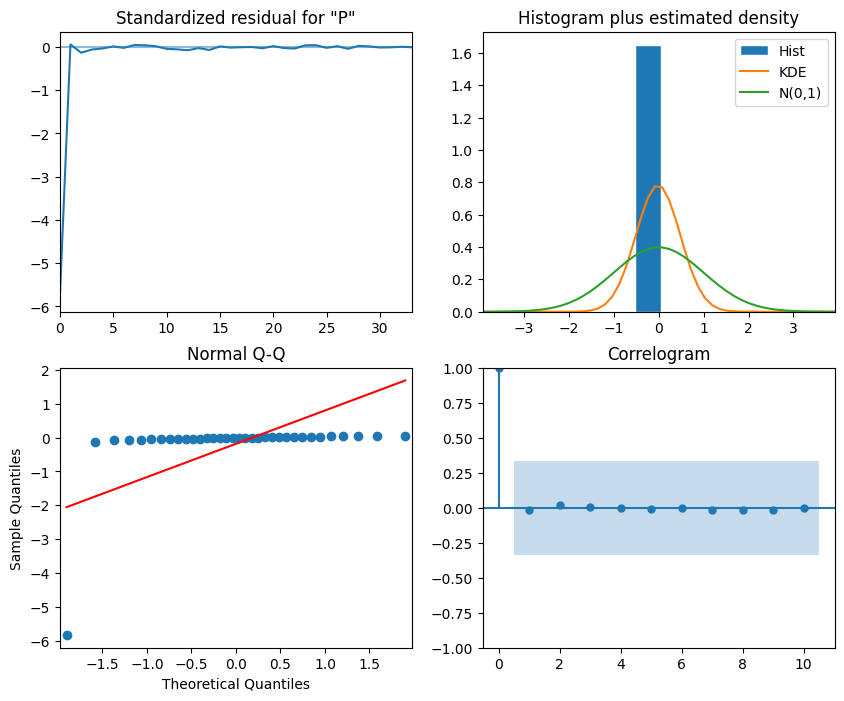

In [17]:
SARIMA_model = SARIMAX(train["PE ratio"], order=(0,1,0), seasonal_order=(0,0,0,4), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

In [18]:
residuals = SARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,9.586645,0.001960
2,9.596056,0.008246
3,9.597869,0.022313
4,9.598123,0.047770
5,9.598816,0.087434
6,9.599113,0.142581
7,9.600406,0.212371
8,9.600460,0.294195
9,9.600702,0.383766
10,9.601955,0.476081


### Residuals are observed values if IID RVs

In [19]:
# Predicting last 10 PEs of the data
SARIMA_pred = SARIMA_model_fit.get_prediction(l-10, l-1).predicted_mean
test['SARIMA_pred'] = SARIMA_pred

<ipython-input-19-dbe47345b5e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SARIMA_pred'] = SARIMA_pred


In [20]:
# Fit GARCH model to the training set
garch_model = arch_model(train['PE ratio'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.252e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [21]:
# Forecast using the GARCH model
garch_forecast = garch_fit.forecast(horizon=len(test))
garch_pred = garch_forecast.mean.iloc[-1].values
test['GARCH_pred'] = garch_pred

<ipython-input-21-a0d20fe8156c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GARCH_pred'] = garch_pred


In [22]:
# Fit ARMA model using pmdarima for automatic selection
arma_model = pm.auto_arima(train['PE ratio'],
                            test='kpss',
                            m=4,               # Seasonal frequency of series
                            seasonal=False,      # No presence of seasonality for standard ARIMA
                            d=None,             # Let the model determine 'd'
                            start_p=0, start_q=0, # Minimum p and q
                            max_p=2, max_q=2,   # Maximum p and q (example values, adjust as needed)
                            D=None,             # Let the model determine 'D'
                            trace=True,         # Print status on the console
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)      # Use stepwise algorithm for faster computation

arma_model.summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=459.795, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=460.480, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=458.961, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.377 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -228.481
Date:                Thu, 18 Jul 2024   AIC                            458.961
Time:                        15:17:11   BIC                            460.488
Sample:                             0   HQIC                           459.482
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.019e+04   2402.573     16.730      0.000    3.55e+04    4.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1360.46
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -5.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Get residuals from the ARMA model
residuals = arma_model.resid()

# Fit GARCH model to the residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Forecast ARMA model
n_forecast = len(test)
arma_forecast, conf_int = arma_model.predict(n_periods=n_forecast, return_conf_int=True)

# Forecast GARCH model
garch_forecast = garch_fit.forecast(horizon=n_forecast)
garch_pred = garch_forecast.mean.iloc[-1].values

# Combine ARMA and GARCH forecasts
test['ARMA_GARCH_pred'] = arma_forecast + garch_pred

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.562e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-23-e6f4f7f3b7e7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARMA_GARCH_pred'] = arma_forecast + garch_pred


In [24]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['PE ratio']])
test_scaled = scaler.transform(test[['PE ratio']])
test1 = df[-15:]
test1_scaled = scaler.transform(test1[['PE ratio']])

In [25]:
# Create the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 5
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)
X_test1, y_test1 = create_dataset(test1_scaled, time_step)

In [26]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)
X_test1 = X_test1.reshape(X_test1.shape[0], time_step, 1)

In [27]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
30/30 [==============================] - 6s 8ms/step - loss: 4.6664e-04
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 3.2036e-04
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 2.6471e-04
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 2.4793e-04
Epoch 5/100
30/30 [==============================] - 0s 9ms/step - loss: 2.6173e-04
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 2.3413e-04
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 2.5643e-04
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 2.4712e-04
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 2.3243e-04
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 2.0011e-04
Epoch 11/100
30/30 [==============================] - 0s 5ms/step - loss: 1.9723e-04
Epoch 12/100
30/30 [==============================] - 0s 6ms/step - loss: 

In [28]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test1)
# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

1/1 [==============================] - 0s 21ms/step


In [29]:
test['LSTM_pred'] = test_predict[:, 0]

<ipython-input-29-feca5b1a0150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_pred'] = test_predict[:, 0]


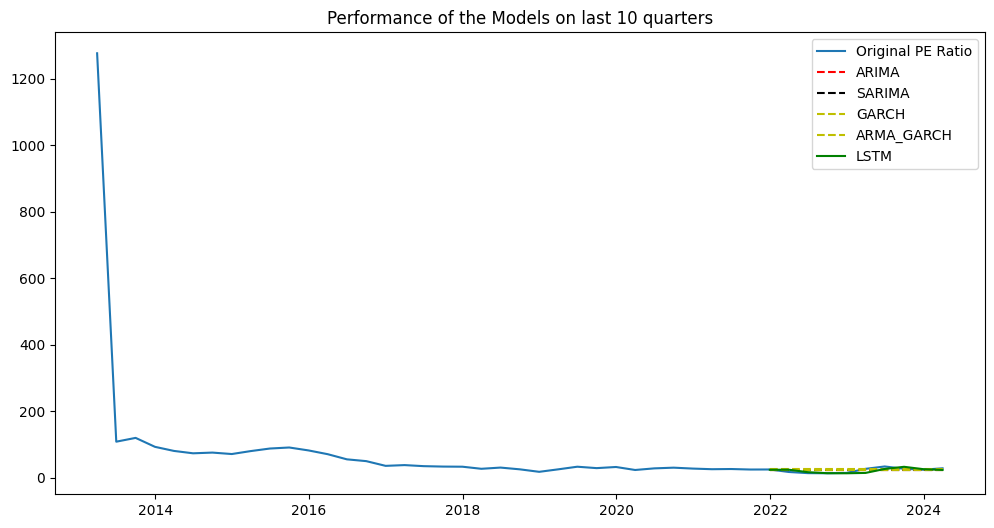

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'],df['PE ratio'], label='Original PE Ratio')
plt.plot(df['Date'][-10:], test['ARIMA_pred'], 'r--', label='ARIMA')
plt.plot(df['Date'][-10:], test['SARIMA_pred'],  'k--', label='SARIMA')
plt.plot(df['Date'][-10:], test['GARCH_pred'],  'y--', label='GARCH')
plt.plot(df['Date'][-10:], test['ARMA_GARCH_pred'],  'y--', label='ARMA_GARCH')
plt.plot(df['Date'][-10:], test['LSTM_pred'],  color = 'green', label='LSTM')
plt.title('Performance of the Models on last 10 quarters')
plt.legend()
plt.show()

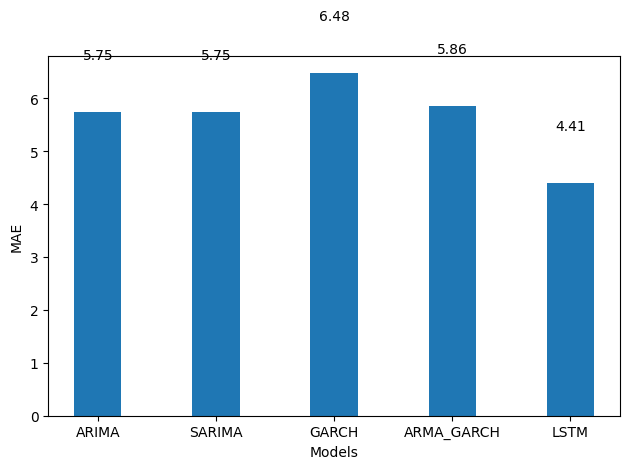

In [31]:
def mae(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)))

mae_ARIMA = mae(test['PE ratio'], test['ARIMA_pred'])
mae_SARIMA = mae(test['PE ratio'], test['SARIMA_pred'])
mae_GARCH = mae(test['PE ratio'], test['GARCH_pred'])
mae_ARMA_GARCH = mae(test['PE ratio'], test['ARMA_GARCH_pred'])
mae_LSTM = mae(test['PE ratio'], test['LSTM_pred'])

fig, ax = plt.subplots()

x = ['ARIMA', 'SARIMA', 'GARCH', 'ARMA_GARCH', 'LSTM']
y = [mae_ARIMA, mae_SARIMA, mae_GARCH, mae_ARMA_GARCH, mae_LSTM]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE')

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')
    plt.tight_layout()

1/1 [==============================] - 0s 21ms/step
Forecasted PE Ratios for the next 20 quarters:
[23.385748 22.684017 22.022915 21.411009 20.839071 20.305407 19.80758
 19.343122 18.909773 18.505415 18.12808  17.775942 17.447296 17.140562
 16.85426  16.587017 16.337551 16.10467  15.887266 15.684298]


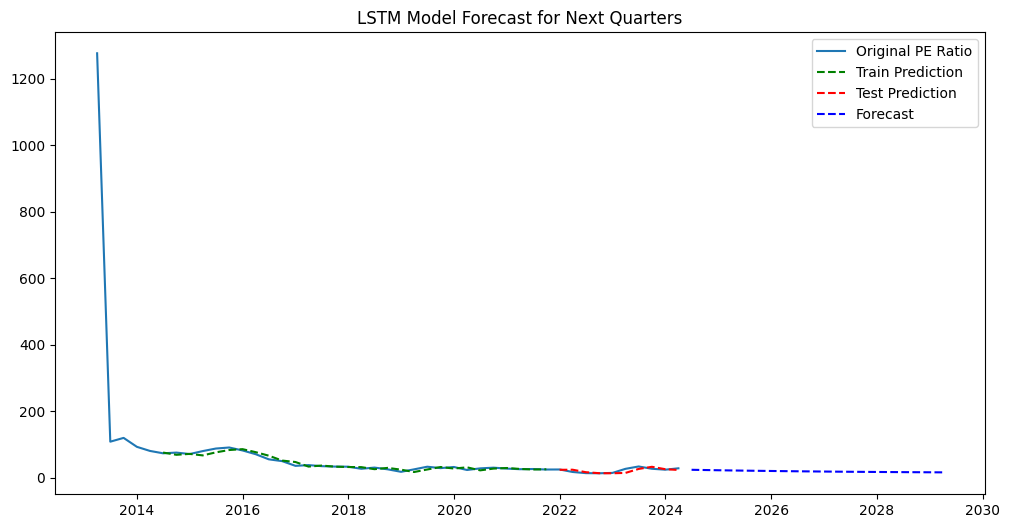

In [32]:
# Forecasting the next n_steps quarters
n_steps = 20 # Number of steps to forecast
last_time_steps = train_scaled[-time_step:]  # Use the last time_step values from training set

forecasts = []
for i in range(n_steps):
    next_pred = model.predict(last_time_steps.reshape(1, time_step, 1))
    forecasts.append(next_pred[0, 0])
    last_time_steps = np.roll(last_time_steps, -1)
    last_time_steps[-1] = next_pred

# Invert forecasts to original scale
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

# Print and plot forecasts
print("Forecasted PE Ratios for the next", n_steps, "quarters:")
print(forecasts.flatten())

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PE ratio'], label='Original PE Ratio')
plt.plot(df['Date'][time_step:train_size], train_predict, 'g--', label='Train Prediction')
plt.plot(df['Date'][-10:], test_predict, 'r--', label='Test Prediction')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=n_steps+1, freq='Q')[1:], forecasts, 'b--', label='Forecast')
plt.title('LSTM Model Forecast for Next Quarters')
plt.legend()
plt.show()

# ROE

In [33]:
url = 'https://www.macrotrends.net/stocks/charts/META/meta-platforms/roe'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'}

response = requests.get(url, headers=headers)
response.raise_for_status()  # Ensure we notice bad responses
data = pd.read_html(response.text, skiprows=1)
df = pd.DataFrame(data[0])
df = pd.concat([df.columns.to_frame().T, df], ignore_index=True)
df.columns = range(len(df.columns))
df = df.rename(columns={0 : 'Date', 1 : 'TTMNI', 2 : 'SE', 3 : 'ROE'})
df.set_index('Date', inplace = True)
df = df.iloc[1:, :]
df['ROE'] = df['ROE'].str.replace('%', '').astype(float)
df.index = pd.to_datetime(df.index)
df = df.sort_index().reset_index()
l = len(df['ROE'])
df.head(5)

,Date,TTMNI,SE,ROE
0,2010-12-31,$0.61B,$2.16B,112.12
1,2011-03-31,$0.66B,NaN,122.85
2,2011-06-30,$0.69B,NaN,128.40
3,2011-09-30,$0.71B,NaN,131.91
4,2011-12-31,$0.67B,$4.90B,54.46


                      Date         ROE
count                   54   54.000000
mean   2017-08-15 02:40:00   27.017222
min    2010-12-31 00:00:00   -0.130000
25%    2014-04-22 18:00:00   13.482500
50%    2017-08-15 00:00:00   21.620000
75%    2020-12-08 00:00:00   26.290000
max    2024-03-31 00:00:00  131.910000
std                    NaN   29.270800


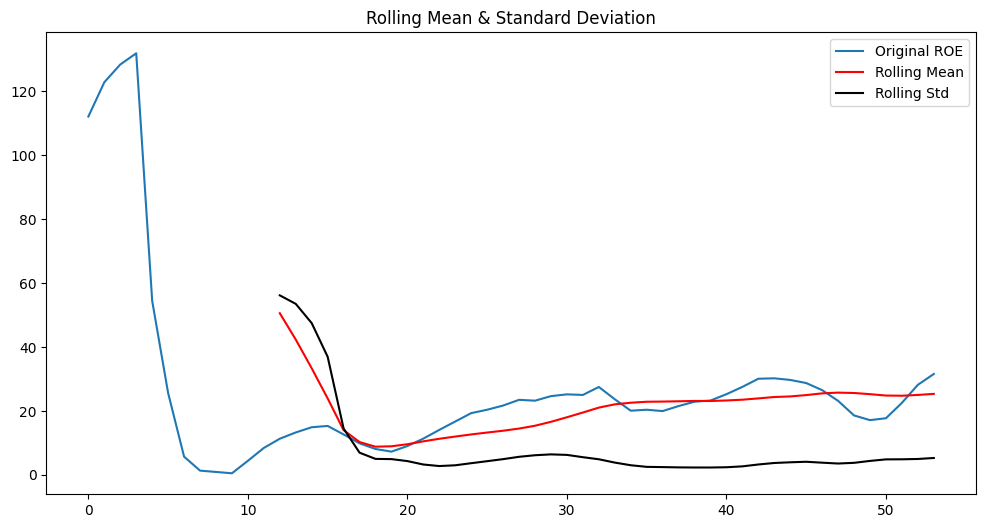

In [36]:
# EDA

# 1. Statistical Summary
df_summary = df.describe()
print(df_summary)

df = df.query('ROE > 0')
# 4. Rolling Statistics
rolling_window = 12

plt.figure(figsize=(12, 6))
rolling_mean = df['ROE'].rolling(window=rolling_window).mean()
rolling_std = df['ROE'].rolling(window=rolling_window).std()

plt.plot(df['ROE'], label='Original ROE')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

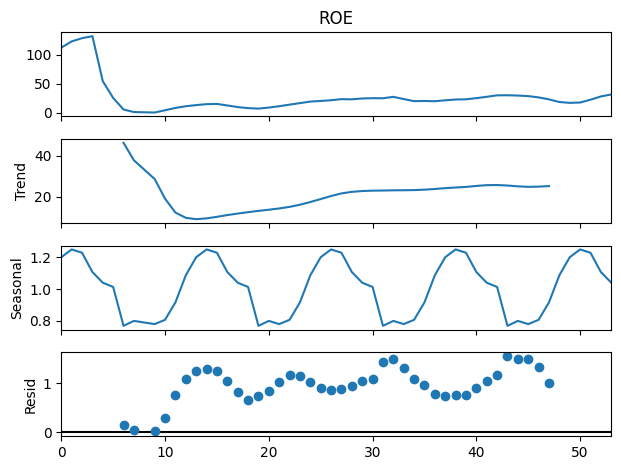

In [37]:
# 5. Decomposition of Time Series
result = seasonal_decompose(df['ROE'], model='multiplicative', period=12)
result.plot()
plt.show()

In [38]:
# Check for stationarity
result = adfuller(df['ROE'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Values {key}: {value}')

ADF Statistic: -1.5414421827006486
p-value: 0.5129200420286582
Critical Values 1%: -3.5745892596209488
Critical Values 5%: -2.9239543084490744
Critical Values 10%: -2.6000391840277777


In [39]:
# Difference the series to make it stationary
df['ROE diff'] = df['ROE'].diff().dropna()
result = adfuller(df['ROE diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Values {key}: {value}')

ADF Statistic: -3.999993584873301
p-value: 0.0014105448448964112
Critical Values 1%: -3.5812576580093696
Critical Values 5%: -2.9267849124681518
Critical Values 10%: -2.6015409829867675


In [ ]:
# # Difference the series to make it stationary
# df['ROE diff'] = df['ROE diff'].diff().dropna()
# result = adfuller(df['ROE diff'].dropna())
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# for key, value in result[4].items():
#     print(f'Critical Values {key}: {value}')

ADF Statistic: -6.203313199933484
p-value: 5.737029897436829e-08
Critical Values 1%: -3.5656240522121956
Critical Values 5%: -2.920142229157715
Critical Values 10%: -2.598014675124952


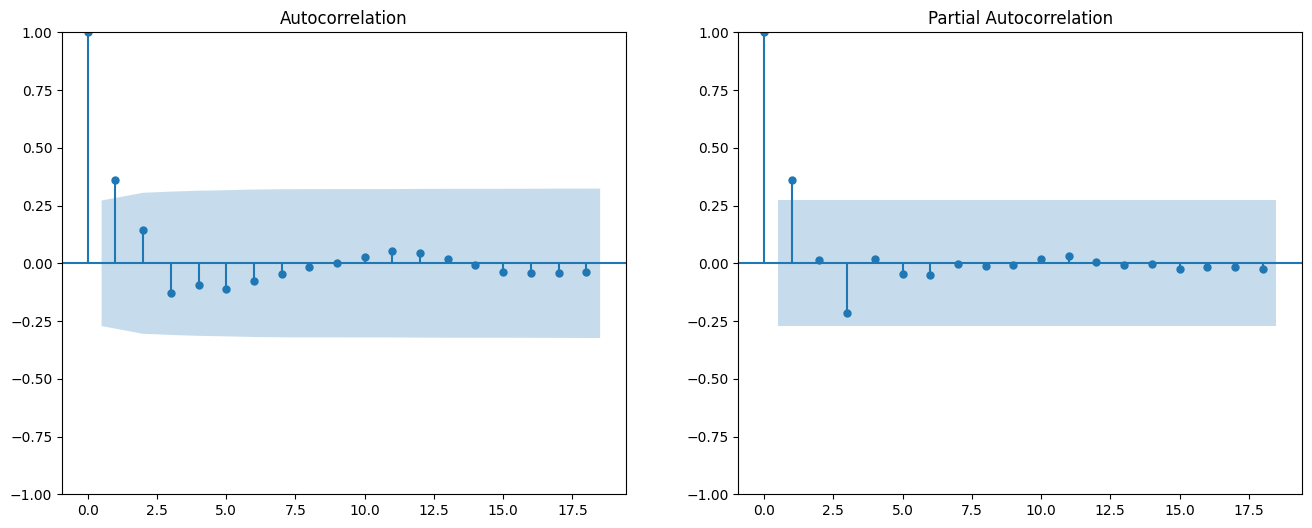

In [41]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df['ROE diff'].dropna(), ax=axes[0])
plot_pacf(df['ROE diff'].dropna(), ax=axes[1])
plt.show()

In [42]:
# Train Test split
train_size = len(df) - 10
train, test = df[:train_size], df[train_size:]

In [43]:
# Fit ARIMA model using pmdarima for automatic selection
ARIMA_model = pm.auto_arima(train['ROE'],
                            test='kpss',
                            m=4,               # Seasonal frequency of series
                            seasonal=False,      # No presence of seasonality for standard ARIMA
                            d=None,             # Let the model determine 'd'
                            start_p=0, start_q=0, # Minimum p and q
                            max_p=2, max_q=2,   # Maximum p and q (example values, adjust as needed)
                            D=None,             # Let the model determine 'D'
                            trace=True,         # Print status on the console
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)      # Use stepwise algorithm for faster computation

ARIMA_model.summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=447.011, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=352.370, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=402.583, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=346.816, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=348.439, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=349.100, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=345.482, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=352.556, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=345.232, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=348.877, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=347.003, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=347.310, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.620 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -167.616
Date:                Thu, 18 Jul 2024   AIC                            345.232
Time:                        15:23:22   BIC                            354.038
Sample:                             0   HQIC                           348.479
                                 - 43                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5683      3.738      0.955      0.340      -3.759      10.895
ar.L1          1.7174      0.109     15.785      0.000       1.504       1.931
ar.L2         -0.8524      0.108     -7.871      0.000      -1.065      -0.640
ma.L1         -0.4671      0.250     -1.869      0.062      -0.957       0.023
sigma2       133.0972     31.908      4.171      0.000      70.559     195.635
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               326.56
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Best Model ARIMA(2, 0, 1)

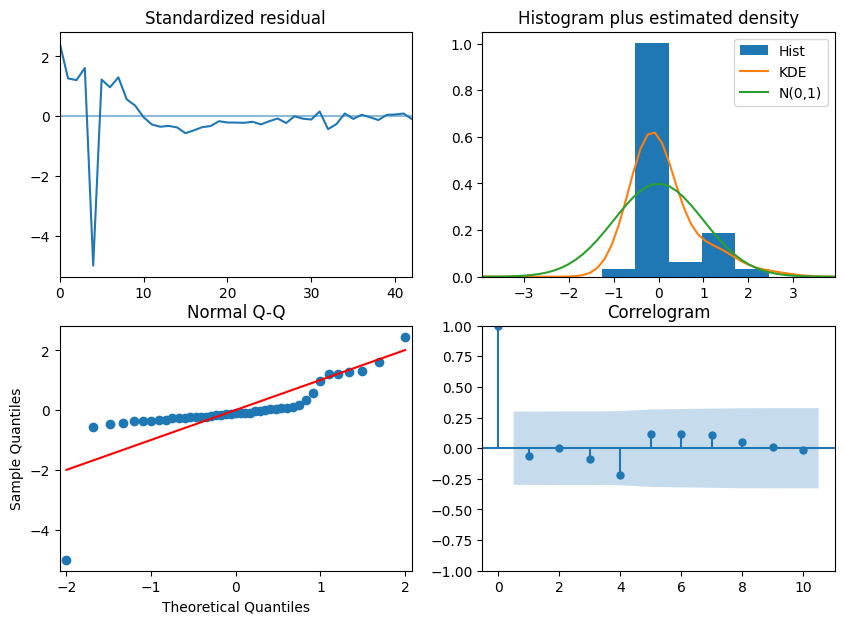

In [44]:
ARIMA_model.plot_diagnostics(figsize=(10,7))
plt.show()

In [45]:
# Ljung-Box test
ARIMA_model = SARIMAX(train['ROE'], order=(2,0,1), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)
residuals = ARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 11, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,lb_stat,lb_pvalue
1,0.093429,0.759862
2,0.157270,0.924377
3,0.194224,0.978516
4,9.987985,0.040631
5,10.013256,0.074861
6,10.019090,0.123850
7,10.095832,0.183208
8,10.103580,0.257831
9,10.126579,0.340336
10,10.131590,0.429025


### Observed residuals are from IID distribution

In [46]:
# Predictions of last 10 months
ARIMA_pred = ARIMA_model_fit.get_prediction(l-10, l-1).predicted_mean
test['ARIMA_pred'] = ARIMA_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-46-5c1591380097>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = ARIMA_pred


In [50]:
# Differencing the data seasonally
df_diff2 = np.diff(df['ROE'], n=4)
result = adfuller(df_diff2)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Values {key}: {value}')

ADF Statistic: -5.675962328194443
p-value: 8.703850867949586e-07
Critical Values 1%: -3.596635636000432
Critical Values 5%: -2.933297331821618
Critical Values 10%: -2.6049909750566895


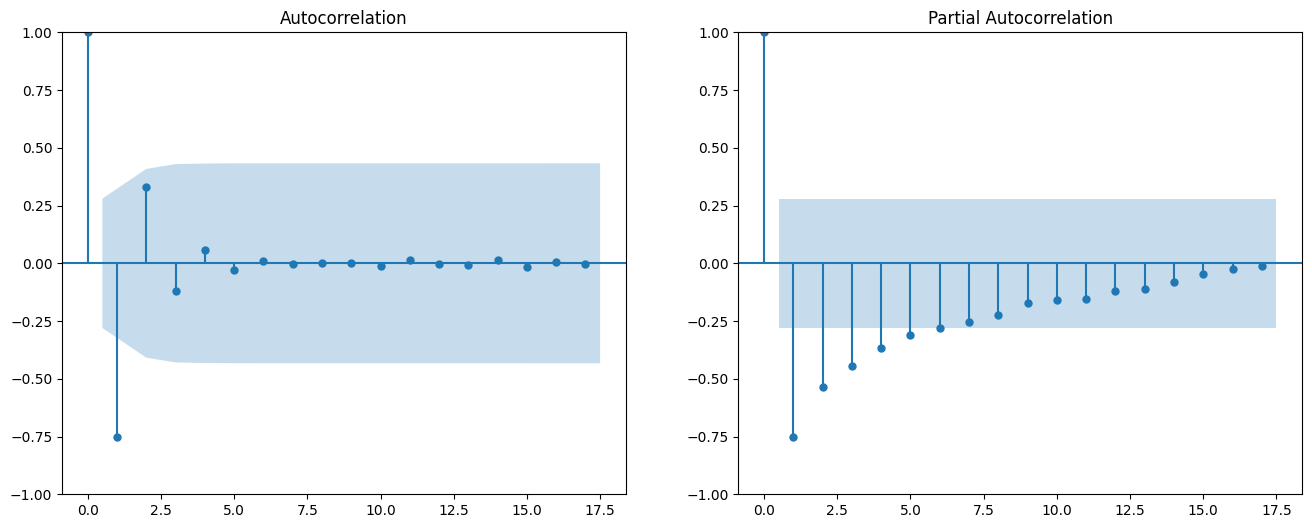

In [51]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(pd.DataFrame(df_diff2).dropna(), ax=axes[0])
plot_pacf(pd.DataFrame(df_diff2).dropna(), ax=axes[1])
plt.show()

In [52]:
SARIMA_model = pm.auto_arima(train["ROE"], start_p=1, start_q=1,
                         test='kpss',
                         max_p=5, max_q=5,
                         m=4, #12 is the frequncy of the cycle
                         start_P=1, start_Q=1,
                         max_P = 5, max_Q=5,
                         seasonal=True, #set to seasonal
                         d=None,
                         D=None,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)
SARIMA_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[4] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=424.327, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=353.568, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=384.636, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=447.011, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=352.556, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=353.017, Time=0.43 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,0)(0,0,0)[4] intercept   : AIC=345.482, Time=0.12 sec
 ARIMA(2,0,0)(1,0,0)[4] intercept   : AIC=347.482, Time=0.29 sec
 ARIMA(2,0,0)(0,0,1)[4] intercept   : AIC=347.482, Time=0.54 sec
 ARIMA(2,0,0)(1,0,1)[4] intercept   : AIC=349.217, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[4] intercept   : AIC=345.313, Time=0.22 sec
 ARIMA(3,0,0)(1,0,0)[4] intercept   : AIC=347.312, Time=0.29 sec
 ARIMA(3,0,0)(0,0,1)[4] intercept   : AIC=347.311, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -167.616
Date:                Thu, 18 Jul 2024   AIC                            345.232
Time:                        15:26:15   BIC                            354.038
Sample:                             0   HQIC                           348.479
                                 - 43                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5683      3.738      0.955      0.340      -3.759      10.895
ar.L1          1.7174      0.109     15.785      0.000       1.504       1.931
ar.L2         -0.8524      0.108     -7.871      0.000      -1.065      -0.640
ma.L1         -0.4671      0.250     -1.869      0.062      -0.957       0.023
sigma2       133.0972     31.908      4.171      0.000      70.559     195.635
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               326.56
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best Model ARIMA(1, 0, 0)(1, 0, 0)[4]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


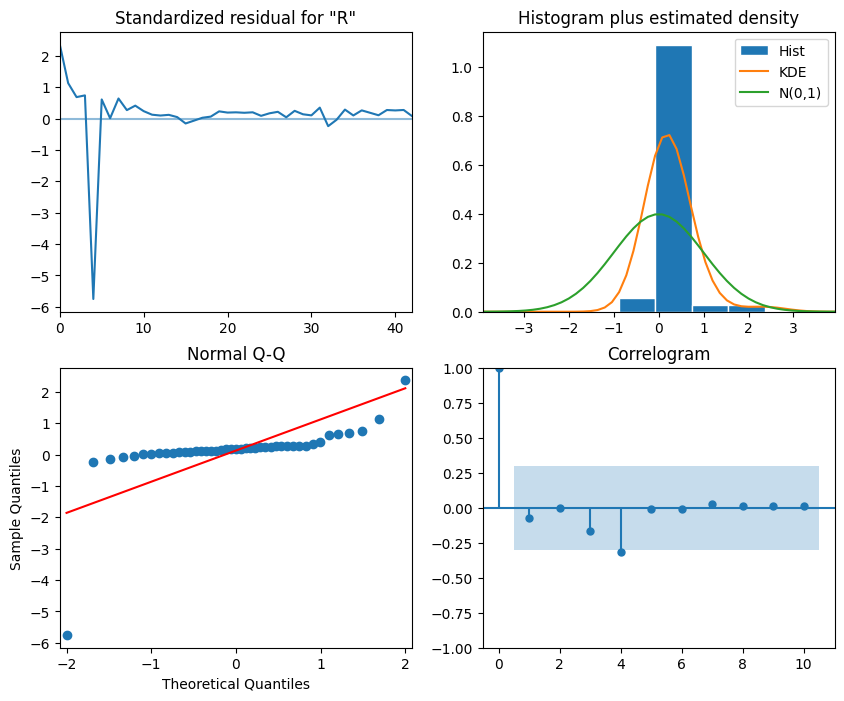

In [53]:
SARIMA_model = SARIMAX(train["ROE"], order=(2,0,1), seasonal_order=(0,0,0,4), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

In [54]:
residuals = SARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,0.093429,0.759862
2,0.157270,0.924377
3,0.194224,0.978516
4,9.987985,0.040631
5,10.013256,0.074861
6,10.019090,0.123850
7,10.095832,0.183208
8,10.103580,0.257831
9,10.126579,0.340336
10,10.131590,0.429025


In [55]:
# Predicting last 10 PEs of the data
SARIMA_pred = SARIMA_model_fit.get_prediction(l-10, l-1).predicted_mean
test['SARIMA_pred'] = SARIMA_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-55-dbe47345b5e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SARIMA_pred'] = SARIMA_pred


In [56]:
# Fit GARCH model to the training set
garch_model = arch_model(train['ROE'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

In [57]:
# Forecast using the GARCH model
garch_forecast = garch_fit.forecast(horizon=len(test))
garch_pred = garch_forecast.mean.iloc[-1].values
test['GARCH_pred'] = garch_pred

<ipython-input-57-a0d20fe8156c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GARCH_pred'] = garch_pred


In [58]:
# Fit ARMA model using pmdarima for automatic selection
arma_model = pm.auto_arima(train['ROE'],
                            test='kpss',
                            m=4,               # Seasonal frequency of series
                            seasonal=False,      # No presence of seasonality for standard ARIMA
                            d=None,             # Let the model determine 'd'
                            start_p=0, start_q=0, # Minimum p and q
                            max_p=2, max_q=2,   # Maximum p and q (example values, adjust as needed)
                            D=None,             # Let the model determine 'D'
                            trace=True,         # Print status on the console
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)      # Use stepwise algorithm for faster computation

arma_model.summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=447.011, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=352.370, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=402.583, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=346.816, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=348.439, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=349.100, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=345.482, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=352.556, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=345.232, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=348.877, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=347.003, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=347.310, Time=0.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.776 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -167.616
Date:                Thu, 18 Jul 2024   AIC                            345.232
Time:                        15:26:57   BIC                            354.038
Sample:                             0   HQIC                           348.479
                                 - 43                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5683      3.738      0.955      0.340      -3.759      10.895
ar.L1          1.7174      0.109     15.785      0.000       1.504       1.931
ar.L2         -0.8524      0.108     -7.871      0.000      -1.065      -0.640
ma.L1         -0.4671      0.250     -1.869      0.062      -0.957       0.023
sigma2       133.0972     31.908      4.171      0.000      70.559     195.635
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               326.56
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
# Get residuals from the ARMA model
residuals = arma_model.resid()

# Fit GARCH model to the residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Forecast ARMA model
n_forecast = len(test)
arma_forecast, conf_int = arma_model.predict(n_periods=n_forecast, return_conf_int=True)

# Forecast GARCH model
garch_forecast = garch_fit.forecast(horizon=n_forecast)
garch_pred = garch_forecast.mean.iloc[-1].values

# Combine ARMA and GARCH forecasts
test['ARMA_GARCH_pred'] = arma_forecast + garch_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-59-e6f4f7f3b7e7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARMA_GARCH_pred'] = arma_forecast + garch_pred


In [60]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['ROE']])
test_scaled = scaler.transform(test[['ROE']])
test1 = df[-15:]
test1_scaled = scaler.transform(test1[['ROE']])

In [61]:
# Create the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 5
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)
X_test1, y_test1 = create_dataset(test1_scaled, time_step)

In [62]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)
X_test1 = X_test1.reshape(X_test1.shape[0], time_step, 1)

In [63]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
38/38 [==============================] - 4s 8ms/step - loss: 0.0074
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 3/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 4/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 5/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 10/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 11/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 13/100
38/38 [=================

In [64]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test1)
# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

1/1 [==============================] - 0s 21ms/step


In [65]:
test['LSTM_pred'] = test_predict[:, 0]

<ipython-input-65-feca5b1a0150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_pred'] = test_predict[:, 0]


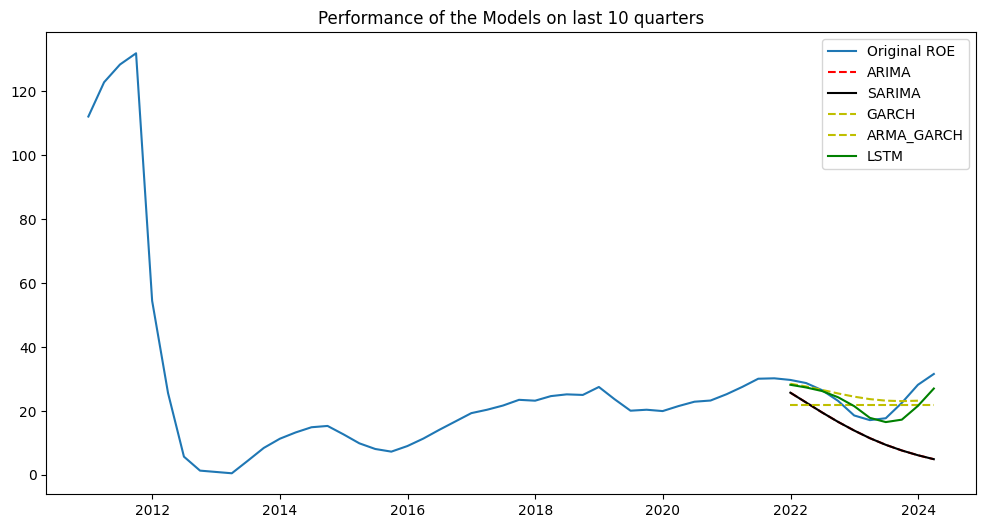

In [66]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'],df['ROE'], label='Original ROE')
plt.plot(df['Date'][-10:], test['ARIMA_pred'], 'r--', label='ARIMA')
plt.plot(df['Date'][-10:], test['SARIMA_pred'],  color = 'black', label='SARIMA')
plt.plot(df['Date'][-10:], test['GARCH_pred'],  'y--', label='GARCH')
plt.plot(df['Date'][-10:], test['ARMA_GARCH_pred'],  'y--', label='ARMA_GARCH')
plt.plot(df['Date'][-10:], test['LSTM_pred'],  color = 'green', label='LSTM')
plt.title('Performance of the Models on last 10 quarters')
plt.legend()
plt.show()

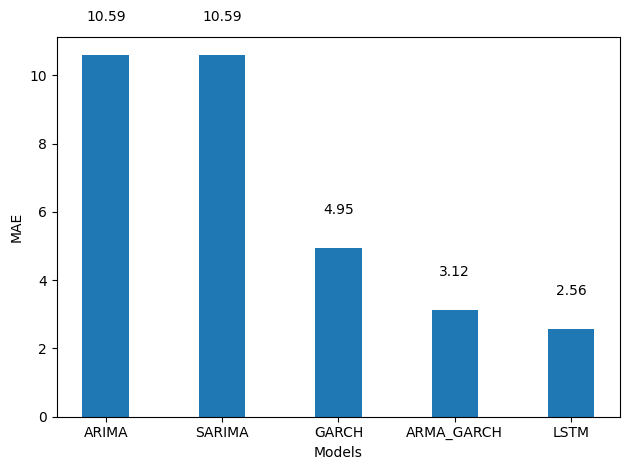

In [67]:
def mae(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)))

mae_ARIMA = mae(test['ROE'], test['ARIMA_pred'])
mae_SARIMA = mae(test['ROE'], test['SARIMA_pred'])
mae_GARCH = mae(test['ROE'], test['GARCH_pred'])
mae_ARMA_GARCH = mae(test['ROE'], test['ARMA_GARCH_pred'])
mae_LSTM = mae(test['ROE'], test['LSTM_pred'])

fig, ax = plt.subplots()

x = ['ARIMA', 'SARIMA', 'GARCH', 'ARMA_GARCH', 'LSTM']
y = [mae_ARIMA, mae_SARIMA, mae_GARCH, mae_ARMA_GARCH, mae_LSTM]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE')

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')
    plt.tight_layout()

1/1 [==============================] - 0s 38ms/step
Forecasted PE Ratios for the next 20 quarters:
[28.193113 26.149137 24.030676 22.164526 20.72485  19.725143 19.091164
 18.748377 18.613071 18.612114 18.688301 18.800215 18.919754 19.029953
 19.122076 19.193129 19.243788 19.276798 19.295782 19.304451]


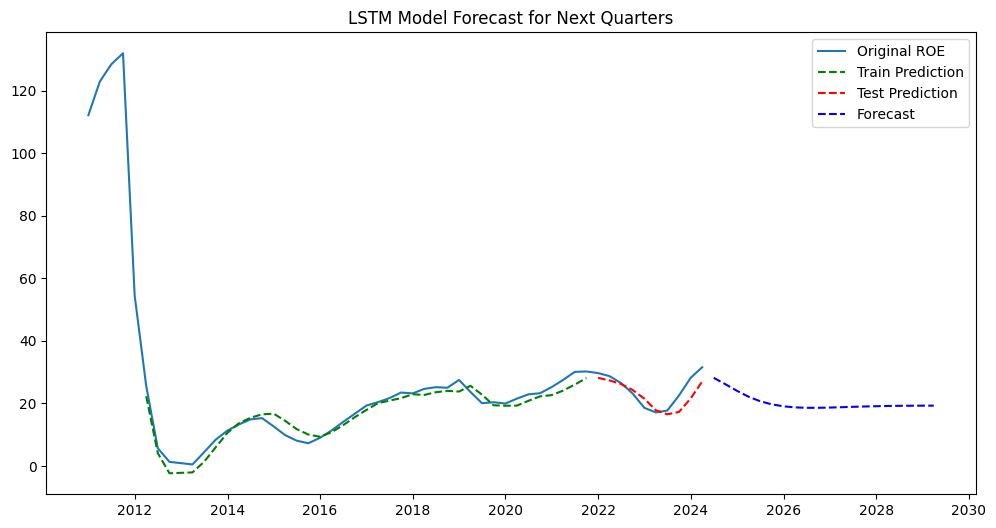

In [68]:
# Forecasting the next n_steps quarters
n_steps = 20 # Number of steps to forecast
last_time_steps = train_scaled[-time_step:]  # Use the last time_step values from training set

forecasts = []
for i in range(n_steps):
    next_pred = model.predict(last_time_steps.reshape(1, time_step, 1))
    forecasts.append(next_pred[0, 0])
    last_time_steps = np.roll(last_time_steps, -1)
    last_time_steps[-1] = next_pred

# Invert forecasts to original scale
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

# Print and plot forecasts
print("Forecasted PE Ratios for the next", n_steps, "quarters:")
print(forecasts.flatten())

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['ROE'], label='Original ROE')
plt.plot(df['Date'][time_step:train_size], train_predict, 'g--', label='Train Prediction')
plt.plot(df['Date'][-10:], test_predict, 'r--', label='Test Prediction')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=n_steps+1, freq='Q')[1:], forecasts, 'b--', label='Forecast')
plt.title('LSTM Model Forecast for Next Quarters')
plt.legend()
plt.show()